DEEPFAKE DETECTION SYSTEM - MEMORY OPTIMIZED

Configuration:
  Dataset Path: C:\Users\adarsh\OneDrive\Documents\GitHub\DEEP_FAKE_DETECTION\data_set
  Image Size: (224, 224)
  Batch Size: 32
  Epochs: 20
  Model Type: Transfer Learning (EfficientNet)

[STEP 1] Creating Data Generators...
Found 801 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.

✓ Data generators created successfully!
  Training samples: 801
  Validation samples: 800
  Test samples: 800
  Classes: {'Real': 0, 'Fake': 1}

[STEP 2] Building Model...
✓ Transfer Learning Model (EfficientNet) created

Model Summary:
  Total parameters: 4,844,196

[STEP 3] Training Model...

STARTING TRAINING


C:\Users\adarsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.4773 - auc: 0.4722 - loss: 1.0812 - precision: 0.4835 - recall: 0.4529
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_deepfake_model.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.4778 - auc: 0.4731 - loss: 1.0800 - precision: 0.4838 - recall: 0.4557 - val_accuracy: 0.5000 - val_auc: 0.4950 - val_loss: 0.6961 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 649ms/step - accuracy: 0.4974 - auc: 0.4822 - loss: 0.9699 - precision: 0.4566 - recall: 0.3790
Epoch 2: val_accuracy did not improve from 0.50000
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4972 - auc: 0.4823 - loss: 0.9713 - precision: 0.4580 - recall: 0.3829 - val_accuracy: 0.5000 - val_auc: 0.5063 - val_loss: 0.6934 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.5288 - auc: 0.5380 - loss: 0.9606 - precision: 0.5271 - recall: 0.4861
Epoch 3: val_accuracy did not improve from 0.50000
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5286 - auc: 0.5380 - loss: 0.9617 - precision: 0.5271 - r

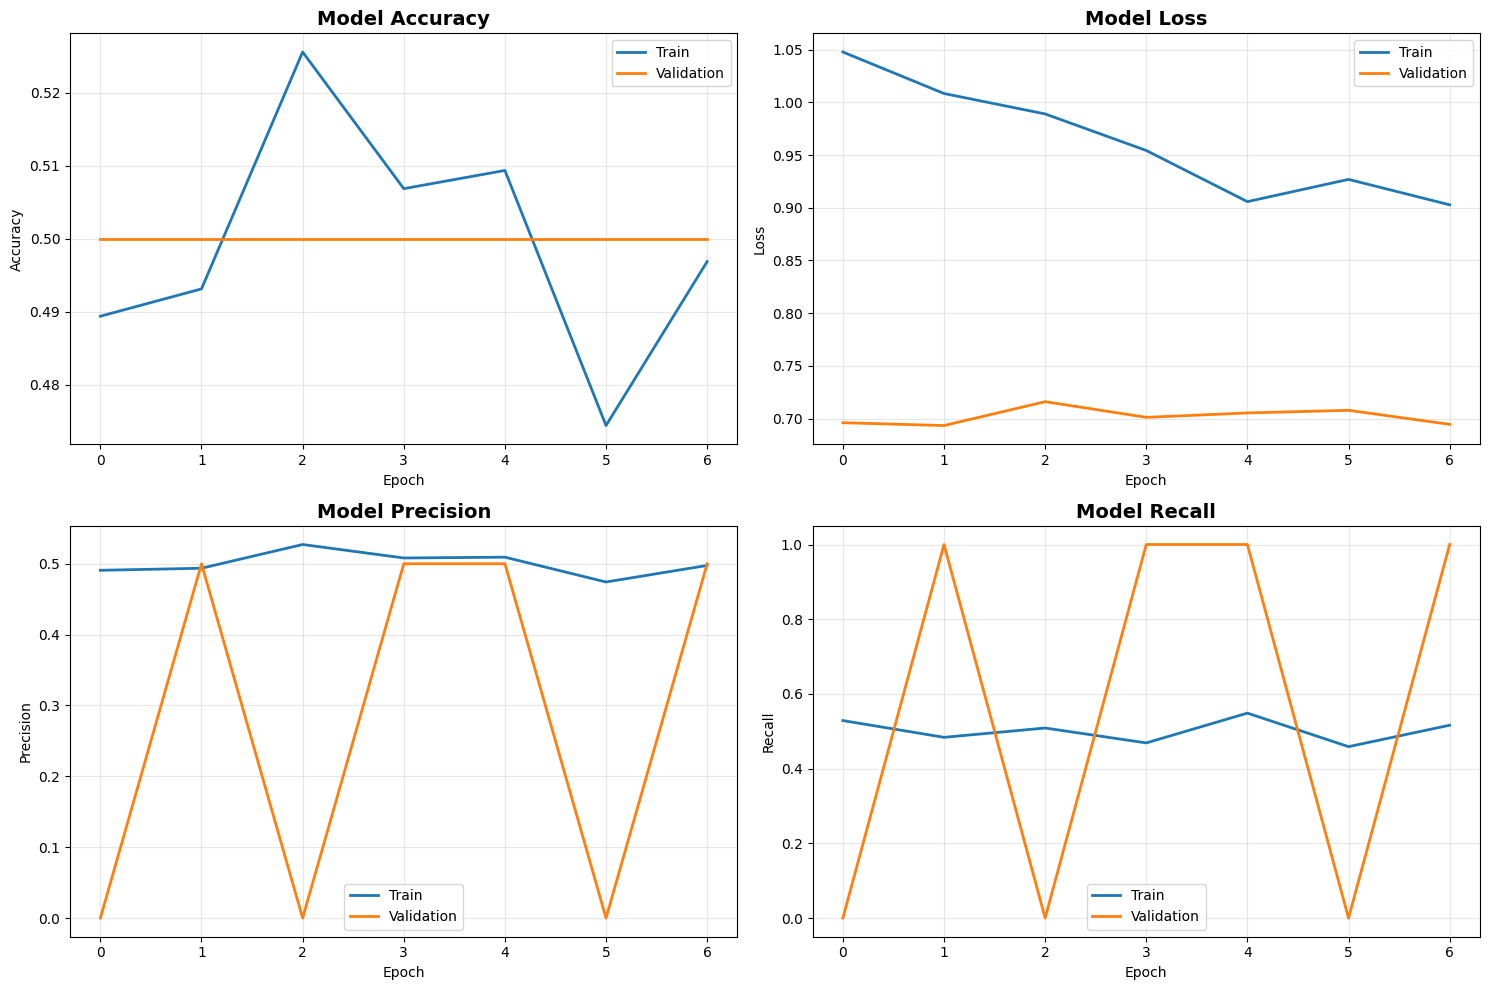


[STEP 5] Final Evaluation...

EVALUATING MODEL ON TEST SET
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 736ms/step - accuracy: 0.1778 - auc: 0.3039 - loss: 0.7041 - precision: 0.1768 - recall: 0.5385

TEST SET RESULTS
Loss:      0.6927
Accuracy:  0.5013 (50.13%)
Precision: 0.5006
Recall:    1.0000
AUC:       0.5602

TRAINING COMPLETE!
✓ Best model saved as: best_deepfake_model.h5
✓ Training history saved as: training_history.png
✓ Final test accuracy: 50.13%


    ✅ ALL DONE! Your model is ready to use!

    To make predictions on new images:


    from deepfake_detector import DeepfakeDetector

    detector = DeepfakeDetector('best_deepfake_model.h5')
    label, confidence = detector.predict_image('your_image.jpg')
    print(f"{label}: {confidence:.2f}%")

    


In [1]:
"""
DEEPFAKE DETECTION USING CNN - MEMORY OPTIMIZED VERSION
Handles large datasets without loading all images into RAM

Required Libraries:
pip install tensorflow opencv-python numpy matplotlib scikit-learn pillow
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ============================================================================
# STEP 1: MEMORY-EFFICIENT DATA LOADING USING KERAS GENERATORS
# ============================================================================

def create_data_generators(dataset_path, img_size=(224, 224), batch_size=32):
    """
    Create data generators that load images on-the-fly
    This prevents memory overload by loading only batches at a time
    """
    
    # Data augmentation for training (helps prevent overfitting)
    train_datagen = ImageDataGenerator(
        rescale=1./255,              # Normalize to [0, 1]
        rotation_range=20,           # Random rotation
        width_shift_range=0.2,       # Random horizontal shift
        height_shift_range=0.2,      # Random vertical shift
        horizontal_flip=True,        # Random horizontal flip
        zoom_range=0.2,              # Random zoom
        shear_range=0.2,             # Random shear
        fill_mode='nearest'
    )
    
    # Only rescaling for validation and test (no augmentation)
    val_test_datagen = ImageDataGenerator(rescale=1./255)
    
    # Create training generator
    train_generator = train_datagen.flow_from_directory(
        os.path.join(dataset_path, 'Train'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',         # Binary classification (Real=0, Fake=1)
        classes=['Real', 'Fake'],    # Ensure correct label mapping
        shuffle=True
    )
    
    # Create validation generator
    validation_generator = val_test_datagen.flow_from_directory(
        os.path.join(dataset_path, 'Validation'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        classes=['Real', 'Fake'],
        shuffle=False
    )
    
    # Create test generator
    test_generator = val_test_datagen.flow_from_directory(
        os.path.join(dataset_path, 'Test'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        classes=['Real', 'Fake'],
        shuffle=False
    )
    
    return train_generator, validation_generator, test_generator

# ============================================================================
# STEP 2: BUILD CNN MODELS
# ============================================================================

def build_simple_cnn(input_shape=(224, 224, 3)):
    """
    Simple CNN Model - Good for learning and smaller datasets
    Less memory intensive than transfer learning
    """
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Fourth Convolutional Block
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        # Output Layer
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    
    return model

def build_transfer_learning_model(input_shape=(224, 224, 3)):
    """
    Transfer Learning Model using EfficientNet - Better accuracy
    Requires more memory but gives better results
    """
    # Load pre-trained EfficientNet
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    
    # Freeze base model layers initially
    base_model.trainable = False
    
    # Build complete model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

# ============================================================================
# STEP 3: TRAINING PIPELINE
# ============================================================================

def train_model(model, train_gen, val_gen, epochs=20, model_name='best_model.h5'):
    """
    Train the model using generators
    """
    
    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 
                 keras.metrics.Precision(name='precision'),
                 keras.metrics.Recall(name='recall'),
                 keras.metrics.AUC(name='auc')]
    )
    
    # Callbacks
    callbacks = [
        # Save best model
        keras.callbacks.ModelCheckpoint(
            model_name,
            save_best_only=True,
            monitor='val_accuracy',
            mode='max',
            verbose=1
        ),
        # Reduce learning rate when plateauing
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-7,
            verbose=1
        ),
        # Early stopping
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        ),
        # TensorBoard logging (optional)
        keras.callbacks.TensorBoard(
            log_dir='./logs',
            histogram_freq=1
        )
    ]
    
    # Train model
    print("\n" + "="*60)
    print("STARTING TRAINING")
    print("="*60)
    
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )
    
    return history

def plot_training_history(history, save_path='training_history.png'):
    """Plot and save training metrics"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train', linewidth=2)
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
    axes[0, 0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train', linewidth=2)
    axes[0, 1].plot(history.history['val_loss'], label='Validation', linewidth=2)
    axes[0, 1].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train', linewidth=2)
    axes[1, 0].plot(history.history['val_precision'], label='Validation', linewidth=2)
    axes[1, 0].set_title('Model Precision', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train', linewidth=2)
    axes[1, 1].plot(history.history['val_recall'], label='Validation', linewidth=2)
    axes[1, 1].set_title('Model Recall', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\n✓ Training history saved to {save_path}")
    plt.show()

# ============================================================================
# STEP 4: EVALUATION
# ============================================================================

def evaluate_model(model, test_gen):
    """Evaluate model on test set"""
    
    print("\n" + "="*60)
    print("EVALUATING MODEL ON TEST SET")
    print("="*60)
    
    results = model.evaluate(test_gen, verbose=1)
    
    print("\n" + "="*60)
    print("TEST SET RESULTS")
    print("="*60)
    print(f"Loss:      {results[0]:.4f}")
    print(f"Accuracy:  {results[1]:.4f} ({results[1]*100:.2f}%)")
    print(f"Precision: {results[2]:.4f}")
    print(f"Recall:    {results[3]:.4f}")
    print(f"AUC:       {results[4]:.4f}")
    print("="*60)
    
    return results

# ============================================================================
# STEP 5: PREDICTION
# ============================================================================

class DeepfakeDetector:
    """Use trained model for prediction"""
    
    def __init__(self, model_path, img_size=(224, 224)):
        self.model = keras.models.load_model(model_path)
        self.img_size = img_size
    
    def predict_image(self, image_path, threshold=0.5):
        """
        Predict if an image is fake or real
        """
        # Load and preprocess image
        img = cv2.imread(image_path)
        if img is None:
            return "Error: Could not load image", 0.0
        
        img = cv2.resize(img, self.img_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)
        
        # Make prediction
        prediction = self.model.predict(img, verbose=0)[0][0]
        
        if prediction >= threshold:
            label = 'FAKE'
            confidence = prediction * 100
        else:
            label = 'REAL'
            confidence = (1 - prediction) * 100
        
        return label, confidence
    
    def predict_batch(self, image_folder):
        """Predict on multiple images in a folder"""
        results = []
        
        for filename in os.listdir(image_folder):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(image_folder, filename)
                label, confidence = self.predict_image(img_path)
                results.append({
                    'filename': filename,
                    'prediction': label,
                    'confidence': confidence
                })
        
        return results

# ============================================================================
# STEP 6: MAIN TRAINING FUNCTION
# ============================================================================

def main_training():
    """
    Complete training pipeline - Memory Optimized!
    """
    
    print("="*60)
    print("DEEPFAKE DETECTION SYSTEM - MEMORY OPTIMIZED")
    print("="*60)
    
    # ========== CONFIGURATION ==========
    DATASET_PATH = r'C:\Users\adarsh\OneDrive\Documents\GitHub\DEEP_FAKE_DETECTION\data_set'
    IMG_SIZE = (224, 224)
    BATCH_SIZE = 32  # Reduce to 16 or 8 if still getting memory errors
    EPOCHS = 20
    MODEL_NAME = 'best_deepfake_model.h5'
    
    # Choose model type
    USE_TRANSFER_LEARNING = True  # Set to False for simple CNN (uses less memory)
    
    print(f"\nConfiguration:")
    print(f"  Dataset Path: {DATASET_PATH}")
    print(f"  Image Size: {IMG_SIZE}")
    print(f"  Batch Size: {BATCH_SIZE}")
    print(f"  Epochs: {EPOCHS}")
    print(f"  Model Type: {'Transfer Learning (EfficientNet)' if USE_TRANSFER_LEARNING else 'Simple CNN'}")
    
    # ========== STEP 1: CREATE DATA GENERATORS ==========
    print("\n[STEP 1] Creating Data Generators...")
    train_gen, val_gen, test_gen = create_data_generators(
        DATASET_PATH, 
        img_size=IMG_SIZE, 
        batch_size=BATCH_SIZE
    )
    
    print(f"\n✓ Data generators created successfully!")
    print(f"  Training samples: {train_gen.samples}")
    print(f"  Validation samples: {val_gen.samples}")
    print(f"  Test samples: {test_gen.samples}")
    print(f"  Classes: {train_gen.class_indices}")
    
    # ========== STEP 2: BUILD MODEL ==========
    print("\n[STEP 2] Building Model...")
    if USE_TRANSFER_LEARNING:
        model = build_transfer_learning_model(input_shape=(*IMG_SIZE, 3))
        print("✓ Transfer Learning Model (EfficientNet) created")
    else:
        model = build_simple_cnn(input_shape=(*IMG_SIZE, 3))
        print("✓ Simple CNN Model created")
    
    print(f"\nModel Summary:")
    print(f"  Total parameters: {model.count_params():,}")
    
    # ========== STEP 3: TRAIN MODEL ==========
    print("\n[STEP 3] Training Model...")
    history = train_model(
        model, 
        train_gen, 
        val_gen, 
        epochs=EPOCHS,
        model_name=MODEL_NAME
    )
    
    # ========== STEP 4: PLOT RESULTS ==========
    print("\n[STEP 4] Plotting Training Results...")
    plot_training_history(history)
    
    # ========== STEP 5: EVALUATE ON TEST SET ==========
    print("\n[STEP 5] Final Evaluation...")
    test_results = evaluate_model(model, test_gen)
    
    # ========== STEP 6: SAVE FINAL RESULTS ==========
    print("\n" + "="*60)
    print("TRAINING COMPLETE!")
    print("="*60)
    print(f"✓ Best model saved as: {MODEL_NAME}")
    print(f"✓ Training history saved as: training_history.png")
    print(f"✓ Final test accuracy: {test_results[1]*100:.2f}%")
    print("="*60)
    
    return model, history

# ============================================================================
# USAGE EXAMPLES
# ============================================================================

def example_prediction():
    """Example: How to use the trained model for prediction"""
    
    print("\n" + "="*60)
    print("EXAMPLE: MAKING PREDICTIONS")
    print("="*60)
    
    # Load trained model
    detector = DeepfakeDetector('best_deepfake_model.h5')
    
    # Predict single image
    print("\n1. Single Image Prediction:")
    label, confidence = detector.predict_image('test_image.jpg')
    print(f"   Result: {label} (Confidence: {confidence:.2f}%)")
    
    # Predict multiple images
    print("\n2. Batch Prediction:")
    results = detector.predict_batch('test_images_folder/')
    for result in results[:5]:  # Show first 5 results
        print(f"   {result['filename']}: {result['prediction']} ({result['confidence']:.2f}%)")

# ============================================================================
# RUN TRAINING
# ============================================================================

if __name__ == "__main__":
    # Start training
    model, history = main_training()
    
    # After training, you can make predictions like this:
    # example_prediction()
    
    print("""
    
    ✅ ALL DONE! Your model is ready to use!
    
    To make predictions on new images:

    
    from deepfake_detector import DeepfakeDetector
    
    detector = DeepfakeDetector('best_deepfake_model.h5')
    label, confidence = detector.predict_image('your_image.jpg')
    print(f"{label}: {confidence:.2f}%")
    
    """)